# Boston Housing Price Prediction

### Import necessary libraries/modules

In [78]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import metrics
import matplotlib.pyplot as plt

### Read the dataset

In [79]:
bostonHouse = pd.read_csv("Housing.csv", delim_whitespace=True)

In [80]:
bostonHouse

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### Split dataset into inputs and target

In [81]:
inputs = bostonHouse.iloc[:, 0:13]
target = bostonHouse.iloc[:, 13:14]

In [82]:
inputs

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [83]:
target

,24.00
0,21.6
1,34.7
2,33.4
3,36.2
4,28.7
...,...
500,22.4
501,20.6
502,23.9
503,22.0


#### Training Dataset 

In [84]:
x_train = inputs.iloc[0:400]
y_train = target.iloc[0:400]

In [85]:
x_train

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666.0,20.2,396.90,19.37
396,7.67202,0.0,18.10,0,0.693,5.747,98.9,1.6334,24,666.0,20.2,393.10,19.92
397,38.35180,0.0,18.10,0,0.693,5.453,100.0,1.4896,24,666.0,20.2,396.90,30.59
398,9.91655,0.0,18.10,0,0.693,5.852,77.8,1.5004,24,666.0,20.2,338.16,29.97


In [86]:
y_train

,24.00
0,21.6
1,34.7
2,33.4
3,36.2
4,28.7
...,...
395,12.5
396,8.5
397,5.0
398,6.3


#### Testing Dataset

In [87]:
x_test = inputs.iloc[400:]
y_test = target.iloc[400:]

In [88]:
x_test

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98
400,14.23620,0.0,18.10,0,0.693,6.343,100.0,1.5741,24,666.0,20.2,396.90,20.32
401,9.59571,0.0,18.10,0,0.693,6.404,100.0,1.6390,24,666.0,20.2,376.11,20.31
402,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666.0,20.2,396.90,19.77
403,41.52920,0.0,18.10,0,0.693,5.531,85.4,1.6074,24,666.0,20.2,329.46,27.38
404,67.92080,0.0,18.10,0,0.693,5.683,100.0,1.4254,24,666.0,20.2,384.97,22.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [89]:
y_test

,24.00
400,7.2
401,12.1
402,8.3
403,8.5
404,5.0
...,...
500,22.4
501,20.6
502,23.9
503,22.0


### Construct NN model

In [90]:
model = Sequential()

In [91]:
model.add(Dense(13, input_dim = 13, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(6, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'normal'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam',
              metrics = ['mean_absolute_percentage_error'])


### Train the model

In [92]:
model.fit(x_train, y_train, epochs = 30, batch_size = 32, verbose = 0)

In [93]:
results = model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 48.3054 - mean_absolute_percentage_error: 45.4767


In [94]:
results

[48.3054313659668, 45.476654052734375]

In [95]:
predictions = model.predict(x_test)

In [96]:
predictions

array([[23.527098 ],
       [22.775007 ],
       [22.673191 ],
       [17.404753 ],
       [18.854715 ],
       [21.33254  ],
       [20.605762 ],
       [19.303444 ],
       [12.152251 ],
       [ 3.9886107],
       [ 5.58021  ],
       [ 4.9950395],
       [12.702498 ],
       [ 5.5537677],
       [ 5.140869 ],
       [ 5.1979575],
       [ 8.478932 ],
       [ 3.492993 ],
       [ 5.765191 ],
       [19.917673 ],
       [20.145754 ],
       [18.228386 ],
       [ 4.847944 ],
       [ 4.7915354],
       [ 4.7890763],
       [ 5.105474 ],
       [ 4.473242 ],
       [ 8.225567 ],
       [ 6.528332 ],
       [ 7.7846313],
       [ 7.6536365],
       [ 8.688468 ],
       [ 8.879799 ],
       [ 8.517473 ],
       [ 8.836613 ],
       [ 5.4040723],
       [ 4.857709 ],
       [ 6.243098 ],
       [23.62838  ],
       [22.462309 ],
       [23.307888 ],
       [24.277727 ],
       [23.40478  ],
       [15.167197 ],
       [ 5.8095593],
       [20.045763 ],
       [23.564983 ],
       [23.99

In [100]:
y_test = np.array(y_test)
print(f"MSE: {metrics.mean_squared_error(y_test, predictions)}")

Actual:  [7.2] [12.1] [8.3] [8.5] [5.] [11.9] [27.9] [17.2] [27.5] [15.] [17.2] [17.9] [16.3] [7.] [7.2] [7.5] [10.4] [8.8] [8.4] [16.7] [14.2] [20.8] [13.4] [11.7] [8.3] [10.2] [10.9] [11.] [9.5] [14.5] [14.1] [16.1] [14.3] [11.7] [13.4] [9.6] [8.7] [8.4] [12.8] [10.5] [17.1] [18.4] [15.4] [10.8] [11.8] [14.9] [12.6] [14.1] [13.] [13.4] [15.2] [16.1] [17.8] [14.9] [14.1] [12.7] [13.5] [14.9] [20.] [16.4] [17.7] [19.5] [20.2] [21.4] [19.9] [19.] [19.1] [19.1] [20.1] [19.9] [19.6] [23.2] [29.8] [13.8] [13.3] [16.7] [12.] [14.6] [21.4] [23.] [23.7] [25.] [21.8] [20.6] [21.2] [19.1] [20.6] [15.2] [7.] [8.1] [13.6] [20.1] [21.8] [24.5] [23.1] [19.7] [18.3] [21.2] [17.5] [16.8] [22.4] [20.6] [23.9] [22.] [11.9]
Predicted: [23.527098] [22.775007] [22.673191] [17.404753] [18.854715] [21.33254] [20.605762] [19.303444] [12.152251] [3.9886107] [5.58021] [4.9950395] [12.702498] [5.5537677] [5.140869] [5.1979575] [8.478932] [3.492993] [5.765191] [19.917673] [20.145754] [18.228386] [4.847944] [4.79

## Visualization of actual value and predicted value

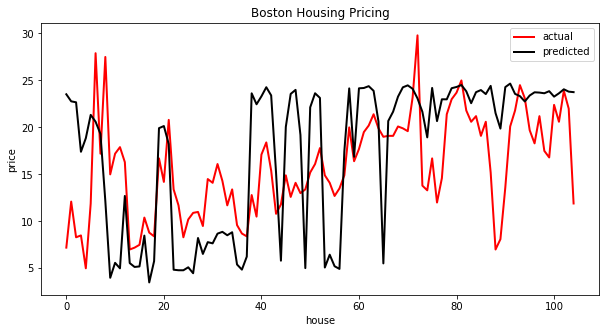

In [103]:
y_test = np.array(y_test)
plt.figure(figsize = (10, 5))
plt.plot(y_test, color = "red", linewidth = 2.0)
plt.plot(predictions, color = "black", linewidth = 2.0)
plt.title("Boston Housing Pricing")
plt.xlabel("house")
plt.ylabel("price")
plt.legend(["actual", "predicted"], loc = "upper right")
plt.show()